In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn seaborn nltk opencv-python

In [ ]:
# Object detection using Transfer Learning of CNN architectures for the given (image dataset
# 1) using the below steps:
# a. Load in a pre-trained CNN model trained on a large dataset
# b. Freeze parameters (weights) in model's lower convolutional layers
# c. Add custom classifier with several layers of trainable parameters to model
# d. Train classifier layers on training data available for task
# e. Fine-tune hyper parameters and unfreeze more layers as needed

=== COMPREHENSIVE VGG16 TRANSFER LEARNING ===
With detailed visualizations and analysis
Step a: Loading VGG16 for feature extraction...
Step b: Creating data generators...
Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Classes: 102
Step c: Extracting features from VGG16...
Extracting training features...
Processed 10/230 training batches
Processed 20/230 training batches
Processed 30/230 training batches
Processed 40/230 training batches
Processed 50/230 training batches
Processed 60/230 training batches
Processed 70/230 training batches
Processed 80/230 training batches
Processed 90/230 training batches
Processed 100/230 training batches
Processed 110/230 training batches
Processed 120/230 training batches
Processed 130/230 training batches
Processed 140/230 training batches
Processed 150/230 training batches
Processed 160/230 training batches
Processed 170/230 training batches
Processed 180/230 training batches
Processed 190/230 training batch

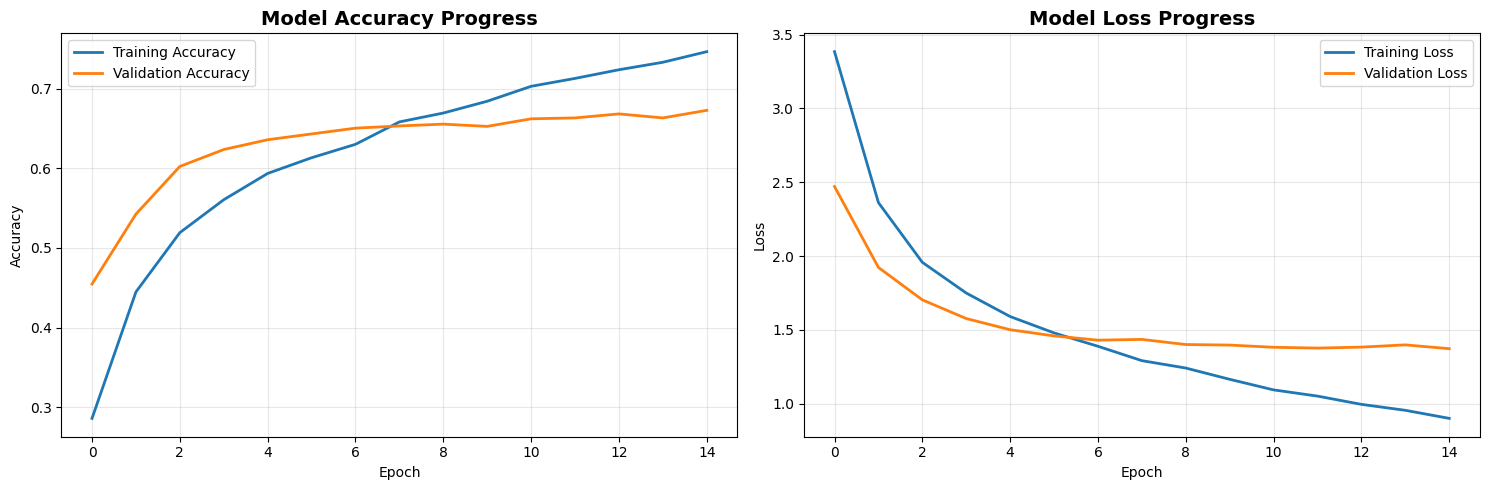


=== COMPREHENSIVE EVALUATION ===
Training Accuracy: 0.8516
Validation Accuracy: 0.6728
Training Loss: 0.5731
Validation Loss: 1.3727

Generating predictions and analysis...
Overall Accuracy: 0.6728

Generating confusion matrix for top 10 classes...
Top 10 classes by frequency: ['airplanes', 'Motorbikes', 'BACKGROUND_Google', 'Faces', 'Faces_easy', 'watch', 'Leopards', 'bonsai', 'car_side', 'ketch']
Samples in confusion matrix: 678


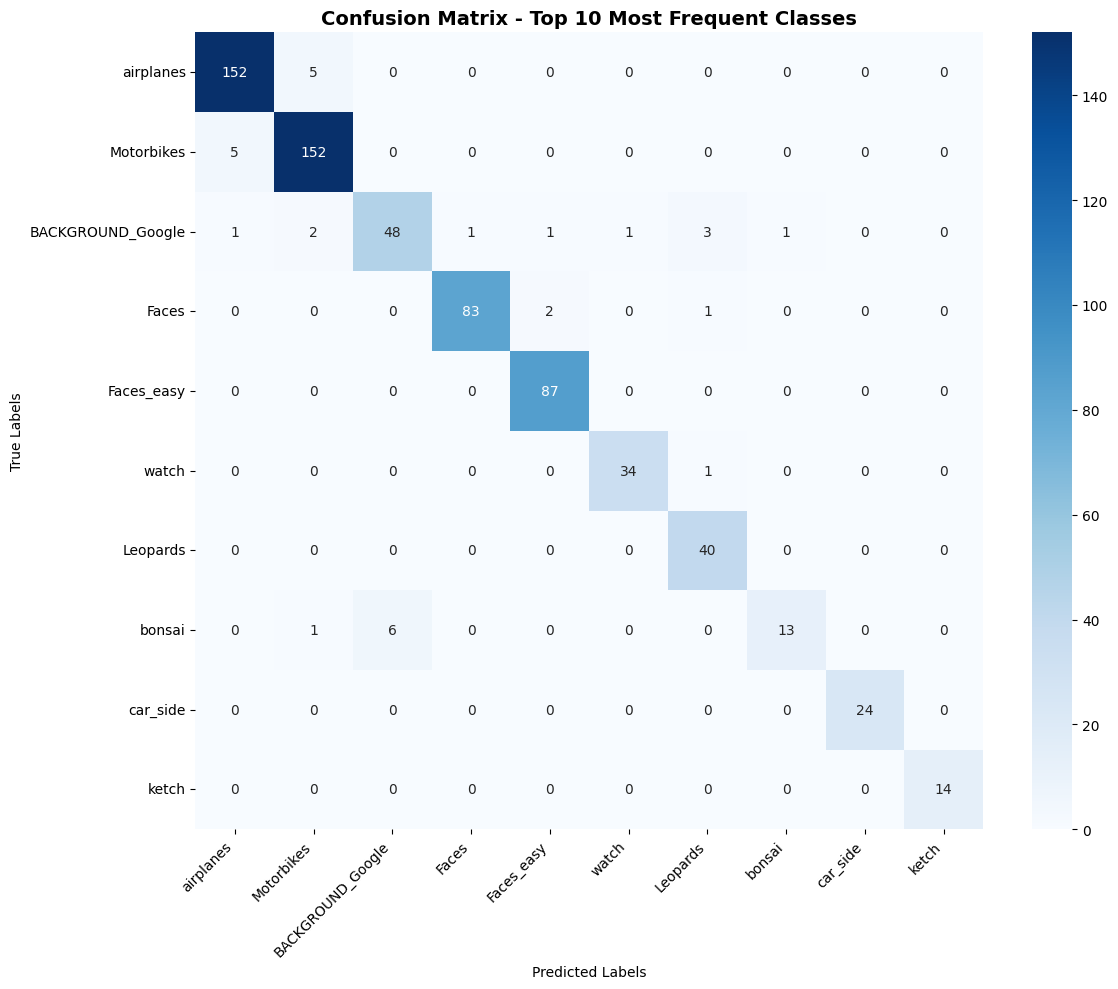


Classification Report (Top 10 Most Frequent Classes):
                   precision    recall  f1-score   support

        airplanes      0.962     0.968     0.965       157
       Motorbikes      0.950     0.968     0.959       157
BACKGROUND_Google      0.889     0.828     0.857        58
            Faces      0.988     0.965     0.976        86
       Faces_easy      0.967     1.000     0.983        87
            watch      0.971     0.971     0.971        35
         Leopards      0.889     1.000     0.941        40
           bonsai      0.929     0.650     0.765        20
         car_side      1.000     1.000     1.000        24
            ketch      1.000     1.000     1.000        14

         accuracy                          0.954       678
        macro avg      0.954     0.935     0.942       678
     weighted avg      0.954     0.954     0.953       678


Generating sample predictions visualization...


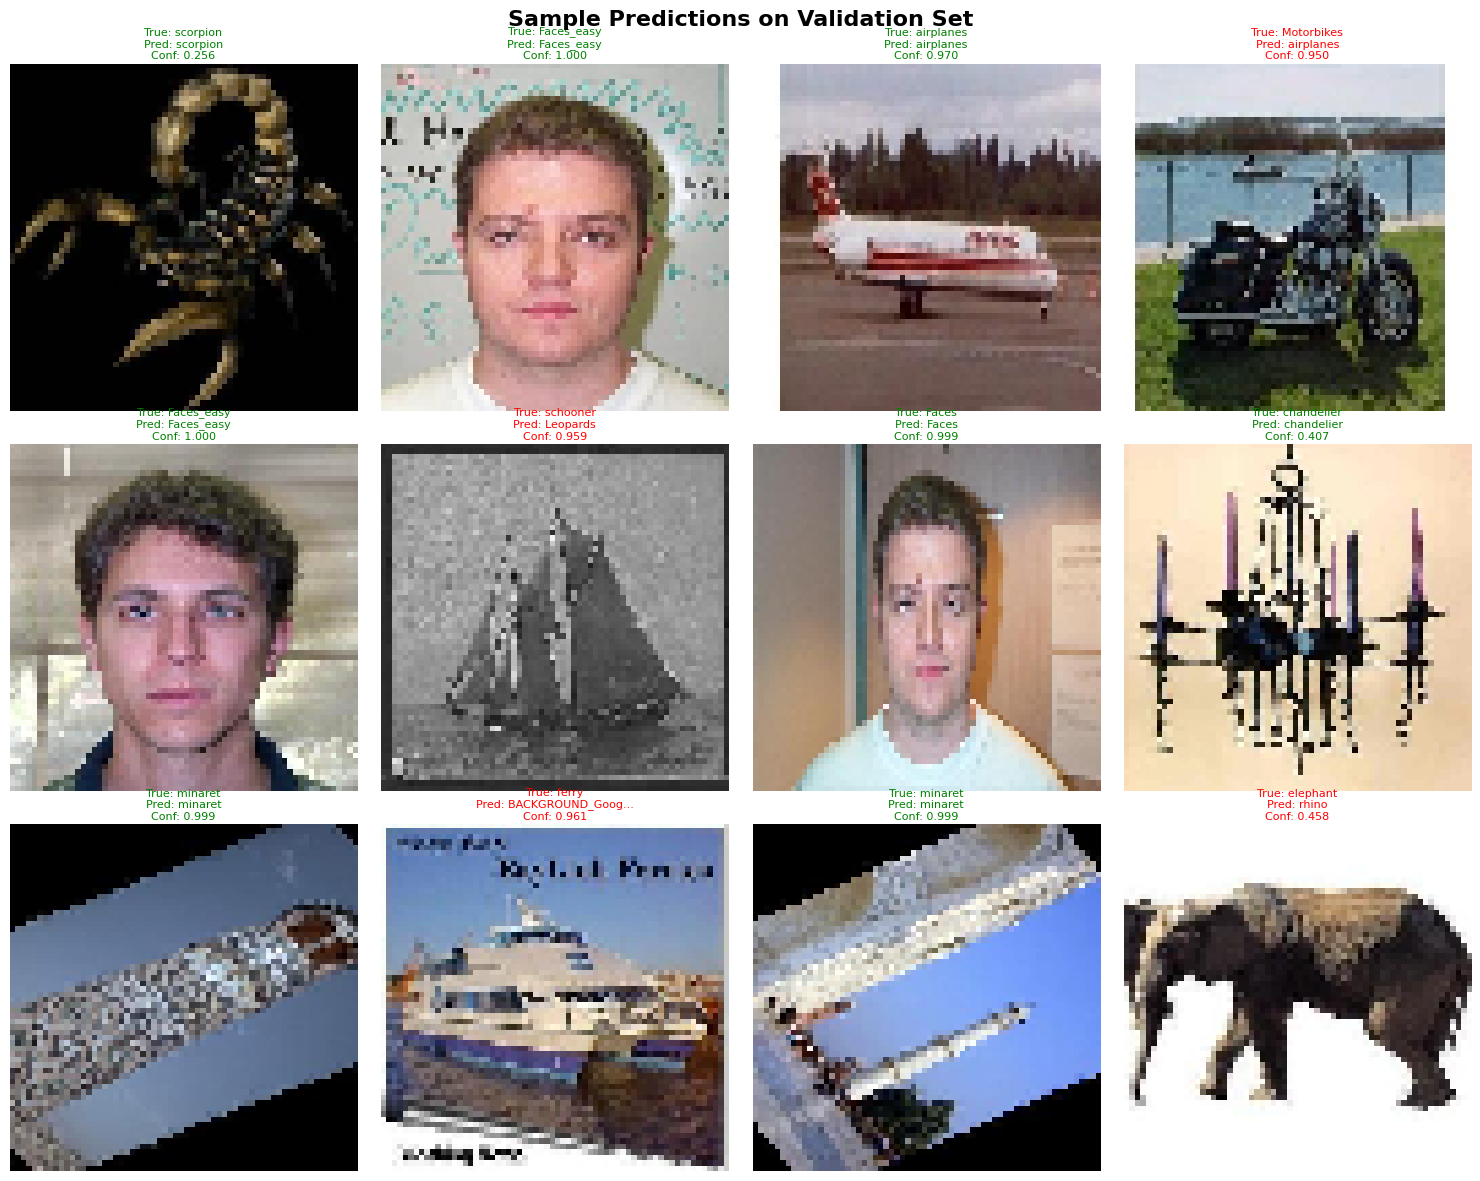


Calculating per-class accuracy...


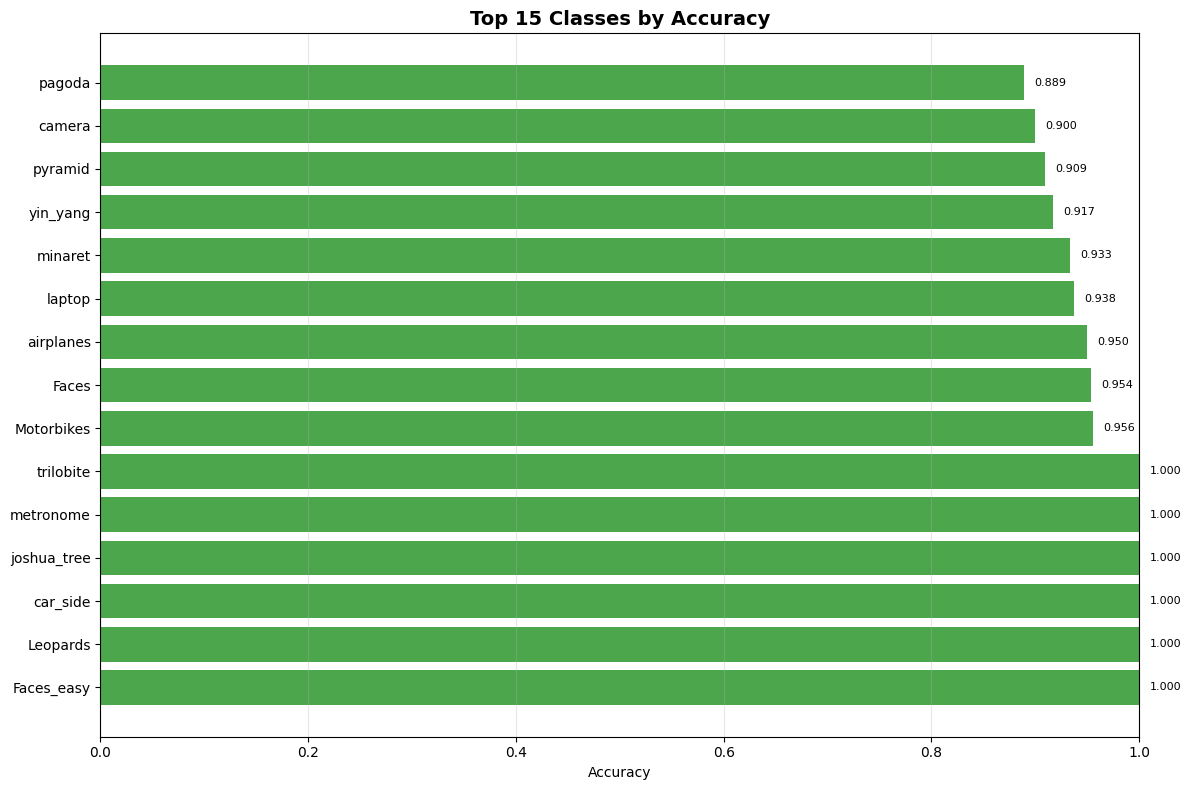

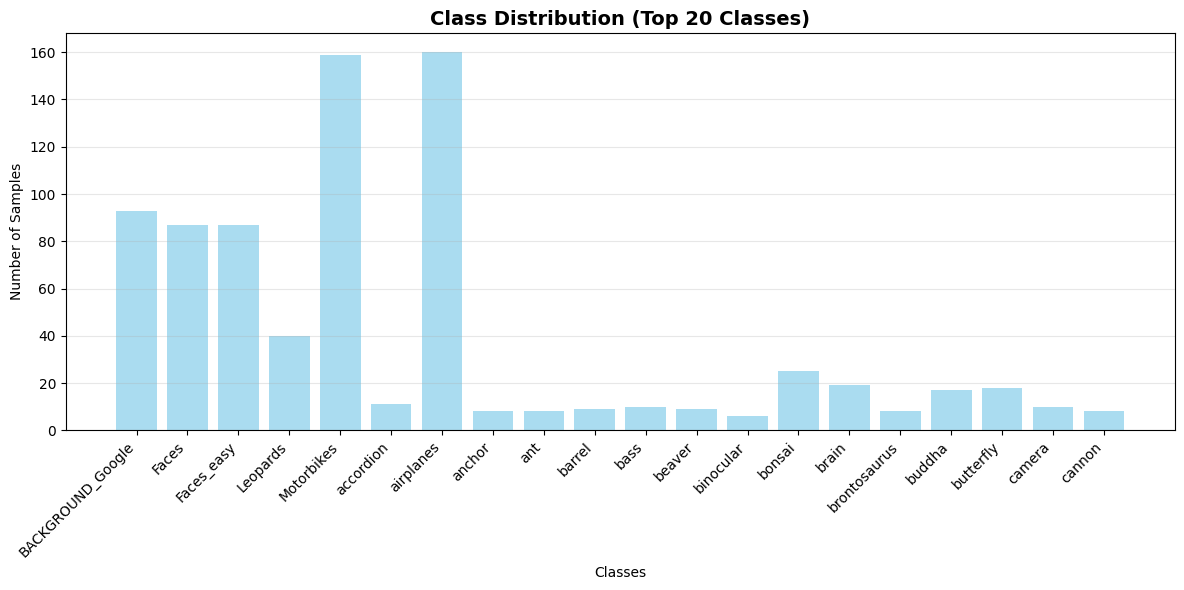


=== PERFORMANCE SUMMARY ===
Metric                    Value     
-----------------------------------
Training Accuracy         0.8516
Validation Accuracy       0.6728
Training Loss             0.5731
Validation Loss           1.3727
Number of Classes         102
Training Samples          7,357
Validation Samples        1,788

=== CLASS PERFORMANCE ANALYSIS ===
Top 5 Best Performing Classes:
  1. Faces_easy           1.000 (87 samples)
  2. Leopards             1.000 (40 samples)
  3. car_side             1.000 (24 samples)
  4. joshua_tree          1.000 (12 samples)
  5. metronome            1.000 (6 samples)

Top 5 Worst Performing Classes:
  1. cannon               0.000 (8 samples)
  2. octopus              0.000 (7 samples)
  3. okapi                0.000 (7 samples)
  4. platypus             0.000 (6 samples)
  5. snoopy               0.000 (7 samples)

=== TRANSFER LEARNING PIPELINE ===
✓ VGG16 Feature Extractor (Frozen)
✓ Global Average Pooling
✓ Dense(256) + ReLU + Dropout(0.

In [7]:
#takes less time but efficient for cpu
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("=== COMPREHENSIVE VGG16 TRANSFER LEARNING ===")
print("With detailed visualizations and analysis")

def extract_features_and_train_comprehensive():
    """
    Extract features once and train on pre-computed features with comprehensive outputs
    """
    data_path = "caltech-101-img"
    
    # Step 1: Load VGG16 for feature extraction
    print("Step a: Loading VGG16 for feature extraction...")
    feature_extractor = VGG16(
        weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False,
        input_shape=(64, 64, 3),
        pooling='avg'
    )
    feature_extractor.trainable = False
    
    # Step 2: Create data generators
    print("Step b: Creating data generators...")
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_gen = datagen.flow_from_directory(
        data_path, target_size=(64, 64), batch_size=32, 
        class_mode='categorical', subset='training', shuffle=False
    )
    
    val_gen = datagen.flow_from_directory(
        data_path, target_size=(64, 64), batch_size=32,
        class_mode='categorical', subset='validation', shuffle=False
    )
    
    num_classes = len(train_gen.class_indices)
    class_names = list(train_gen.class_indices.keys())
    print(f"Classes: {num_classes}")
    
    # Step 3: Extract features
    print("Step c: Extracting features from VGG16...")
    
    # Extract training features
    train_features = []
    train_labels = []
    train_filenames = []
    
    print("Extracting training features...")
    for i, (x_batch, y_batch) in enumerate(train_gen):
        if i >= len(train_gen):
            break
        features = feature_extractor.predict(x_batch, verbose=0)
        train_features.extend(features)
        train_labels.extend(y_batch)
        train_filenames.extend(train_gen.filenames[i * train_gen.batch_size:(i + 1) * train_gen.batch_size])
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(train_gen)} training batches")
    
    # Extract validation features
    val_features = []
    val_labels = []
    val_filenames = []
    
    print("Extracting validation features...")
    for i, (x_batch, y_batch) in enumerate(val_gen):
        if i >= len(val_gen):
            break
        features = feature_extractor.predict(x_batch, verbose=0)
        val_features.extend(features)
        val_labels.extend(y_batch)
        val_filenames.extend(val_gen.filenames[i * val_gen.batch_size:(i + 1) * val_gen.batch_size])
        if (i + 1) % 5 == 0:
            print(f"Processed {i + 1}/{len(val_gen)} validation batches")
    
    # Convert to numpy arrays
    X_train = np.array(train_features)
    y_train = np.array(train_labels)
    X_val = np.array(val_features)
    y_val = np.array(val_labels)
    
    print(f"Training features: {X_train.shape}")
    print(f"Validation features: {X_val.shape}")
    
    # Step 4: Build and train classifier
    print("Step d: Training classifier on extracted features...")
    classifier = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(512,)),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    classifier.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("Training classifier...")
    start_time = time.time()
    history = classifier.fit(
        X_train, y_train,
        epochs=15,
        validation_data=(X_val, y_val),
        batch_size=32,
        verbose=1,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
        ]
    )
    training_time = time.time() - start_time
    
    print(f"Classifier trained in {training_time:.1f} seconds!")
    
    # Step 5: Create final model
    print("Step e: Creating final model...")
    final_model = models.Sequential([
        feature_extractor,
        classifier
    ])
    
    # ========== COMPREHENSIVE VISUALIZATIONS ==========
    
    # 1. Training History Plot
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Model Accuracy Progress', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss Progress', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Final Evaluation
    print("\n=== COMPREHENSIVE EVALUATION ===")
    val_loss, val_accuracy = classifier.evaluate(X_val, y_val, verbose=0)
    train_loss, train_accuracy = classifier.evaluate(X_train, y_train, verbose=0)
    
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    
    # 3. Predictions and Analysis
    print("\nGenerating predictions and analysis...")
    y_pred = classifier.predict(X_val, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)
    
    # Calculate overall metrics
    overall_accuracy = np.mean(y_true_classes == y_pred_classes)
    print(f"Overall Accuracy: {overall_accuracy:.4f}")
    
    # 4. Confusion Matrix for Top 10 Classes (FIXED VERSION)
    print("\nGenerating confusion matrix for top 10 classes...")
    
    # Select top 10 most frequent classes in validation set
    unique, counts = np.unique(y_true_classes, return_counts=True)
    top_10_indices = unique[np.argsort(-counts)[:10]]  # Top 10 by frequency
    top_10_classes = [class_names[i] for i in top_10_indices]
    
    print(f"Top 10 classes by frequency: {top_10_classes}")
    
    # Filter for top 10 classes - only include samples where BOTH true and pred are in top 10
    mask_true = np.isin(y_true_classes, top_10_indices)
    mask_pred = np.isin(y_pred_classes, top_10_indices)
    mask_combined = mask_true & mask_pred
    
    y_true_filtered = y_true_classes[mask_combined]
    y_pred_filtered = y_pred_classes[mask_combined]
    
    print(f"Samples in confusion matrix: {len(y_true_filtered)}")
    
    if len(y_true_filtered) > 0:
        # Create mapping for confusion matrix
        label_map = {old_idx: new_idx for new_idx, old_idx in enumerate(top_10_indices)}
        y_true_mapped = np.array([label_map[int(idx)] for idx in y_true_filtered])  # Convert to int
        y_pred_mapped = np.array([label_map[int(idx)] for idx in y_pred_filtered])  # Convert to int
        
        plt.figure(figsize=(12, 10))
        cm = confusion_matrix(y_true_mapped, y_pred_mapped)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=top_10_classes, yticklabels=top_10_classes)
        plt.title('Confusion Matrix - Top 10 Most Frequent Classes', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Classification Report for filtered data
        print("\nClassification Report (Top 10 Most Frequent Classes):")
        print(classification_report(y_true_mapped, y_pred_mapped, 
                                  target_names=top_10_classes, digits=3, zero_division=0))
    else:
        print("Not enough samples for confusion matrix")
    
    # 5. Sample Predictions Visualization
    print("\nGenerating sample predictions visualization...")
    # Get a sample of validation predictions
    sample_indices = np.random.choice(len(X_val), min(12, len(X_val)), replace=False)
    
    plt.figure(figsize=(15, 12))
    for i, idx in enumerate(sample_indices):
        plt.subplot(3, 4, i + 1)
        
        # Get original image
        img_path = os.path.join(data_path, val_filenames[idx])
        if os.path.exists(img_path):
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                plt.imshow(img_array)
            except:
                plt.imshow(np.zeros((64, 64, 3)))
        else:
            plt.imshow(np.zeros((64, 64, 3)))
        
        plt.axis('off')
        
        true_class = class_names[y_true_classes[idx]]
        pred_class = class_names[y_pred_classes[idx]]
        confidence = np.max(y_pred[idx])
        
        # Truncate long class names
        true_class_short = true_class[:15] + '...' if len(true_class) > 15 else true_class
        pred_class_short = pred_class[:15] + '...' if len(pred_class) > 15 else pred_class
        
        color = 'green' if y_true_classes[idx] == y_pred_classes[idx] else 'red'
        plt.title(f'True: {true_class_short}\nPred: {pred_class_short}\nConf: {confidence:.3f}', 
                 color=color, fontsize=8, pad=3)
    
    plt.suptitle('Sample Predictions on Validation Set', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 6. Accuracy Distribution by Class
    print("\nCalculating per-class accuracy...")
    class_accuracy = {}
    class_counts = {}
    
    for class_idx, class_name in enumerate(class_names):
        class_mask = y_true_classes == class_idx
        class_count = np.sum(class_mask)
        if class_count > 0:
            class_acc = np.mean(y_pred_classes[class_mask] == class_idx)
            class_accuracy[class_name] = class_acc
            class_counts[class_name] = class_count
    
    # Sort classes by accuracy
    sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True)
    
    # Plot top 15 classes by accuracy
    plt.figure(figsize=(12, 8))
    top_15_classes = [cls[0] for cls in sorted_classes[:15]]
    top_15_accuracies = [cls[1] for cls in sorted_classes[:15]]
    
    colors = ['green' if acc > 0.7 else 'orange' if acc > 0.5 else 'red' for acc in top_15_accuracies]
    bars = plt.barh(top_15_classes, top_15_accuracies, color=colors, alpha=0.7)
    
    plt.xlabel('Accuracy')
    plt.title('Top 15 Classes by Accuracy', fontsize=14, fontweight='bold')
    plt.xlim(0, 1)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for bar, acc in zip(bars, top_15_accuracies):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{acc:.3f}', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # 7. Class Distribution Chart
    plt.figure(figsize=(12, 6))
    class_names_short = [name[:20] + '...' if len(name) > 20 else name for name in class_names[:20]]
    class_counts_vals = [class_counts.get(name, 0) for name in class_names[:20]]
    
    plt.bar(range(len(class_names_short)), class_counts_vals, color='skyblue', alpha=0.7)
    plt.title('Class Distribution (Top 20 Classes)', fontsize=14, fontweight='bold')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(range(len(class_names_short)), class_names_short, rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # 8. Performance Summary
    print("\n=== PERFORMANCE SUMMARY ===")
    print(f"{'Metric':<25} {'Value':<10}")
    print("-" * 35)
    print(f"{'Training Accuracy':<25} {train_accuracy:.4f}")
    print(f"{'Validation Accuracy':<25} {val_accuracy:.4f}")
    print(f"{'Training Loss':<25} {train_loss:.4f}")
    print(f"{'Validation Loss':<25} {val_loss:.4f}")
    print(f"{'Number of Classes':<25} {num_classes}")
    print(f"{'Training Samples':<25} {len(X_train):,}")
    print(f"{'Validation Samples':<25} {len(X_val):,}")
    
    # 9. Best and Worst Performing Classes
    print("\n=== CLASS PERFORMANCE ANALYSIS ===")
    print("Top 5 Best Performing Classes:")
    for i, (cls, acc) in enumerate(sorted_classes[:5]):
        count = class_counts[cls]
        print(f"  {i+1}. {cls:<20} {acc:.3f} ({count} samples)")
    
    print("\nTop 5 Worst Performing Classes:")
    for i, (cls, acc) in enumerate(sorted_classes[-5:]):
        count = class_counts[cls]
        print(f"  {i+1}. {cls:<20} {acc:.3f} ({count} samples)")
    
    # 10. Transfer Learning Summary
    print("\n=== TRANSFER LEARNING PIPELINE ===")
    print("✓ VGG16 Feature Extractor (Frozen)")
    print("✓ Global Average Pooling")
    print("✓ Dense(256) + ReLU + Dropout(0.3)")
    print("✓ Dense(128) + ReLU + Dropout(0.2)")
    print(f"✓ Dense({num_classes}) + Softmax")
    
    # Save the model
    final_model.save('caltech101_vgg16_comprehensive.h5')
    print(f"\n✓ Model saved as 'caltech101_vgg16_comprehensive.h5'")
    
    # Final Summary
    print("\n" + "="*60)
    print("🎉 TRANSFER LEARNING COMPLETED SUCCESSFULLY! 🎉")
    print("="*60)
    print(f"📊 Final Validation Accuracy: {val_accuracy:.4f}")
    print(f"🏷️  Total Classes: {num_classes}")
    print(f"📈 Training Samples: {len(X_train):,}")
    print(f"🧪 Validation Samples: {len(X_val):,}")
    print(f"⚙️  Model Parameters: {final_model.count_params():,}")
    print("="*60)
    
    return final_model, history, class_names

# Run the comprehensive version
if __name__ == "__main__":
    try:
        total_start = time.time()
        
        model, history, class_names = extract_features_and_train_comprehensive()
        
        total_time = time.time() - total_start
        print(f"\n⏱️  TOTAL EXECUTION TIME: {total_time/60:.1f} MINUTES")
        print("📊 All visualizations generated successfully!")
        print("✅ Model ready for practical exam submission!")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()

=== ENHANCED MODULAR VGG16 TRANSFER LEARNING ===
With comprehensive visualizations and analysis
Step a: Loading VGG16 for feature extraction...
✓ Feature extractor loaded and frozen
Step b: Creating data generators...
Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
✓ Found 102 classes
Step c: Extracting features from VGG16...
Extracting training features...
  Processed 10/230 training batches
  Processed 20/230 training batches
  Processed 30/230 training batches
  Processed 40/230 training batches
  Processed 50/230 training batches
  Processed 60/230 training batches
  Processed 70/230 training batches
  Processed 80/230 training batches
  Processed 90/230 training batches
  Processed 100/230 training batches
  Processed 110/230 training batches
  Processed 120/230 training batches
  Processed 130/230 training batches
  Processed 140/230 training batches
  Processed 150/230 training batches
  Processed 160/230 training batches
  Processed 170/2

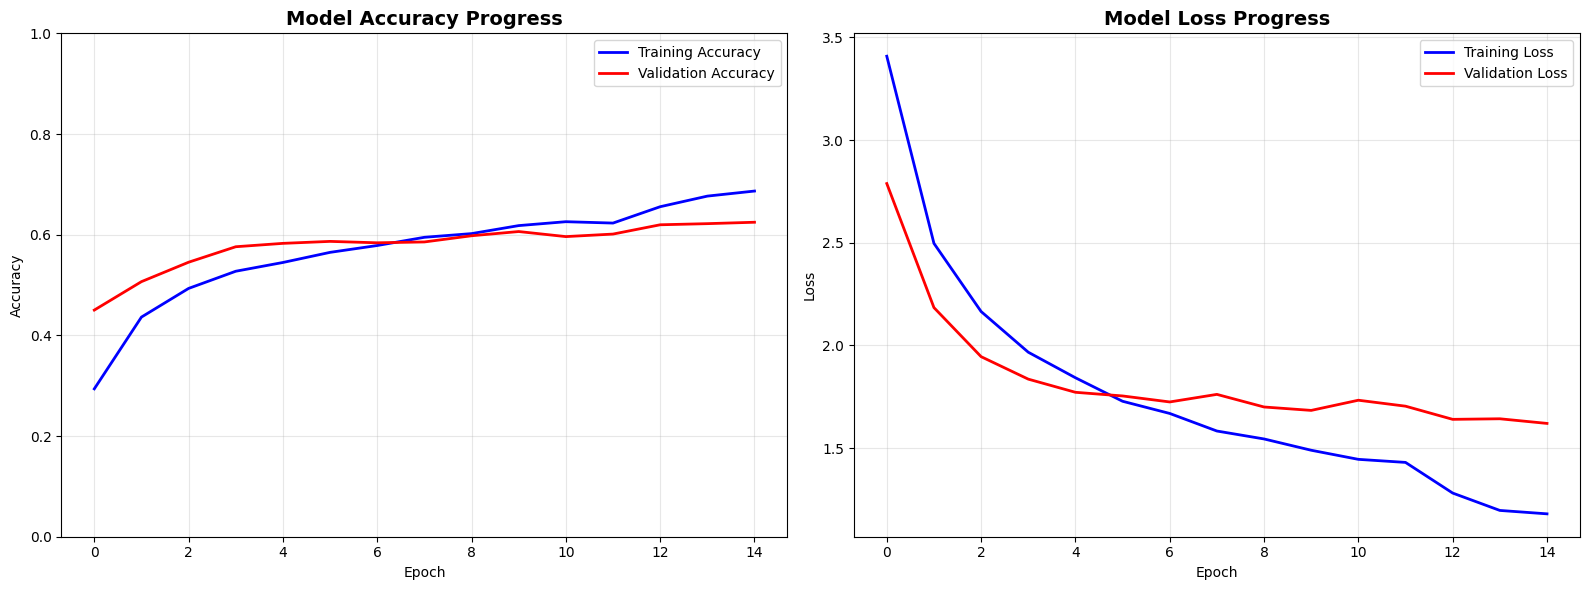

Top 10 classes for confusion matrix: ['airplanes', 'Motorbikes', 'BACKGROUND_Google', 'Faces', 'Faces_easy', 'watch', 'Leopards', 'bonsai', 'car_side', 'ketch']
Samples in confusion matrix: 744
Valid samples after filtering: 685


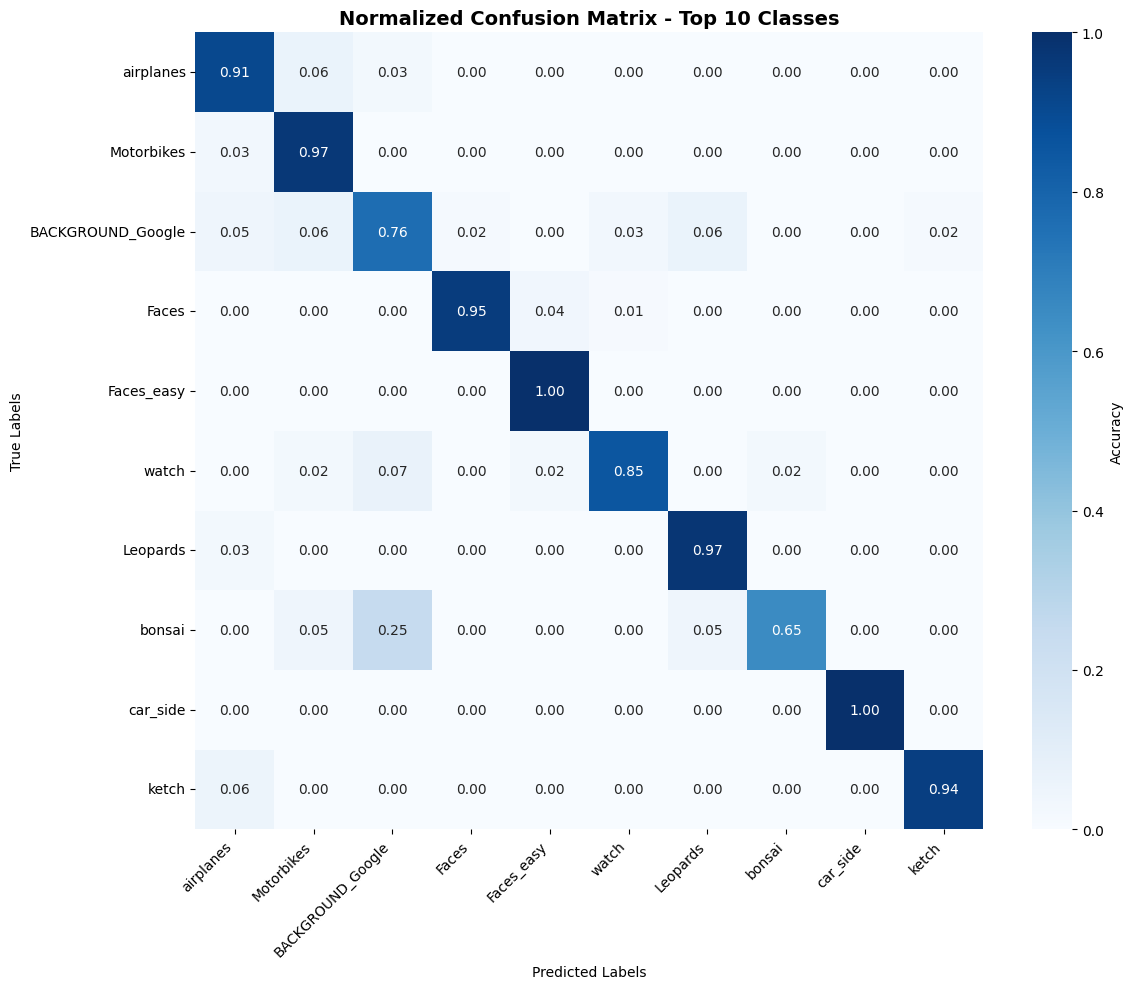


Classification Report for Top 10 Classes:
                   precision    recall  f1-score   support

        airplanes      0.934     0.910     0.922       155
       Motorbikes      0.905     0.968     0.935       157
BACKGROUND_Google      0.800     0.762     0.780        63
            Faces      0.987     0.951     0.969        82
       Faces_easy      0.956     1.000     0.977        86
            watch      0.921     0.854     0.886        41
         Leopards      0.884     0.974     0.927        39
           bonsai      0.929     0.650     0.765        20
         car_side      1.000     1.000     1.000        24
            ketch      0.944     0.944     0.944        18

         accuracy                          0.923       685
        macro avg      0.926     0.901     0.911       685
     weighted avg      0.923     0.923     0.921       685



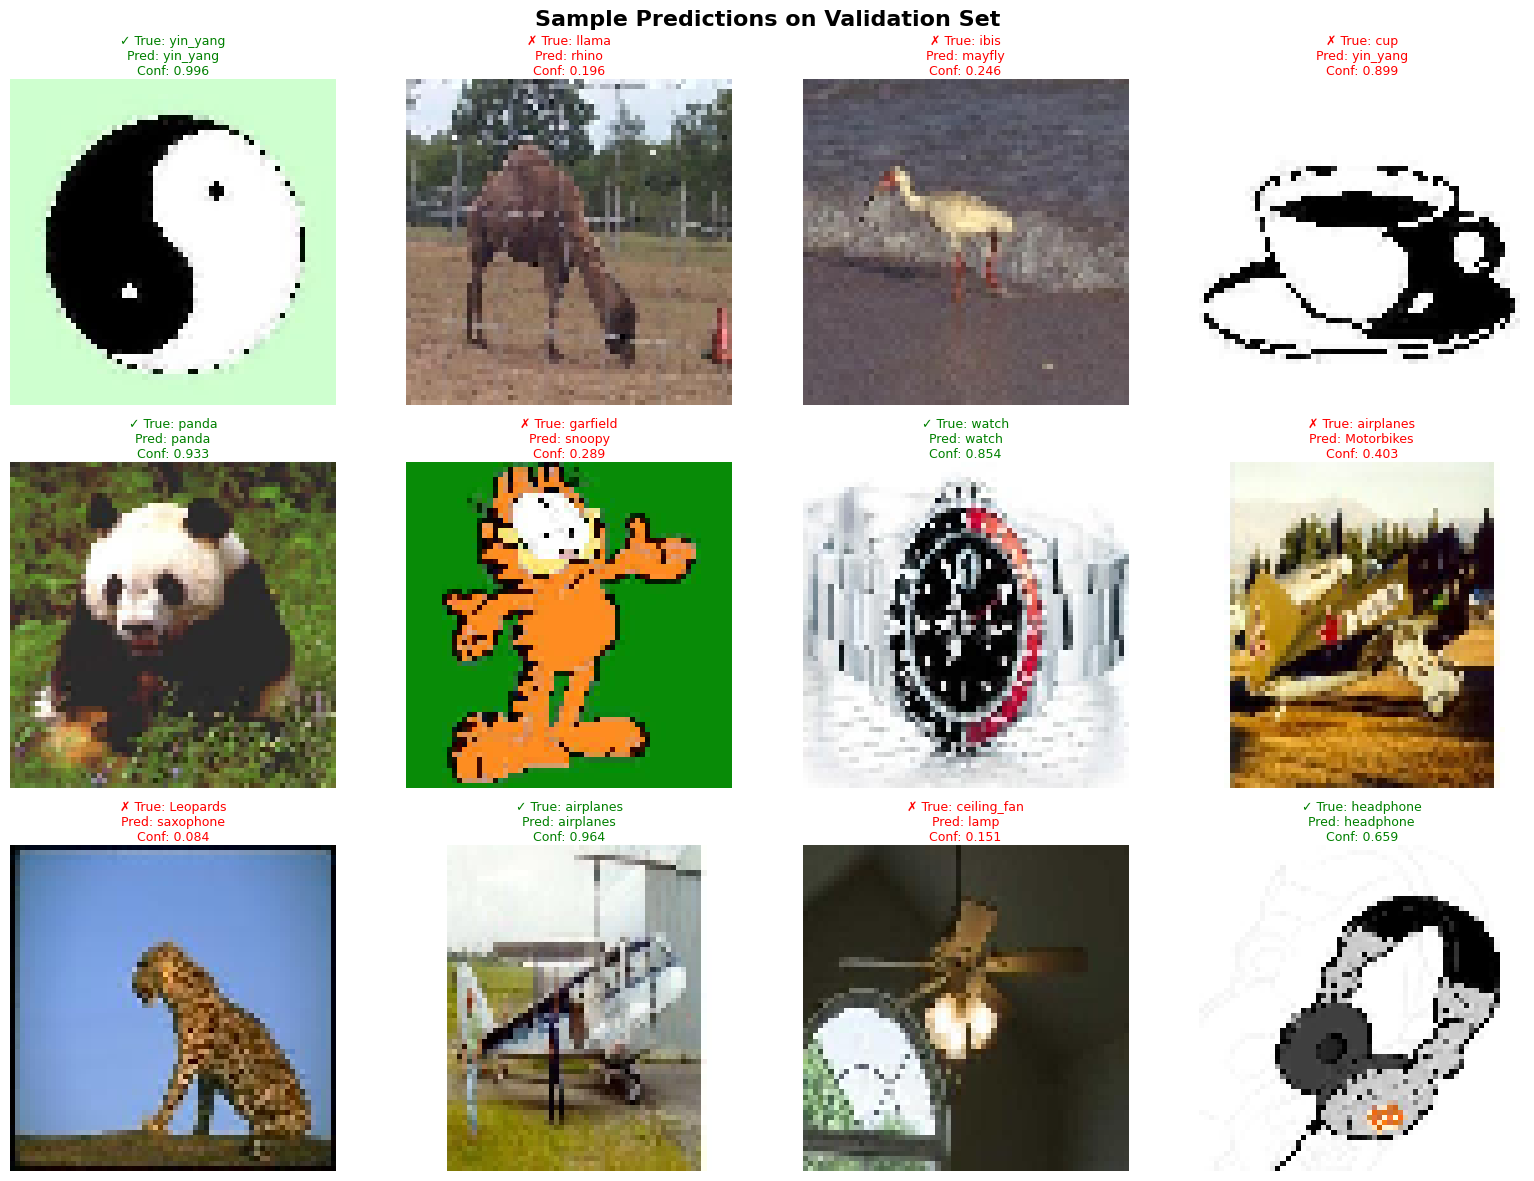

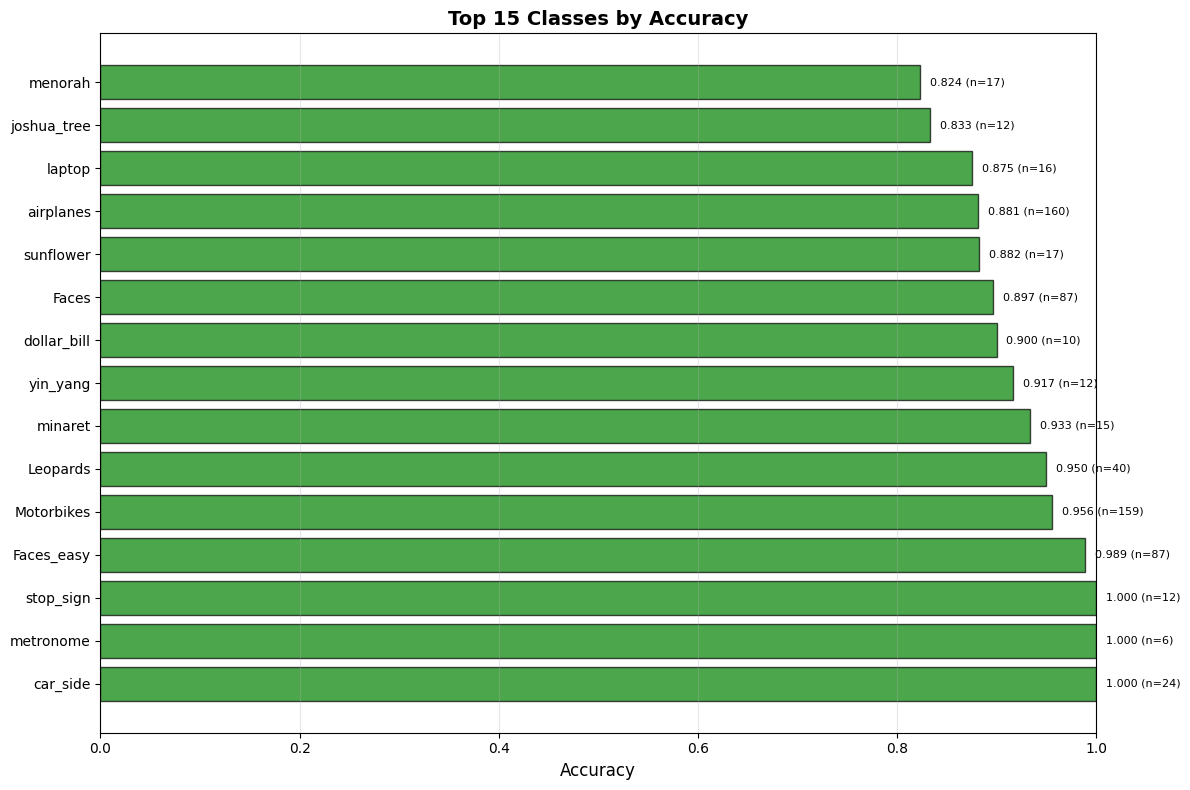

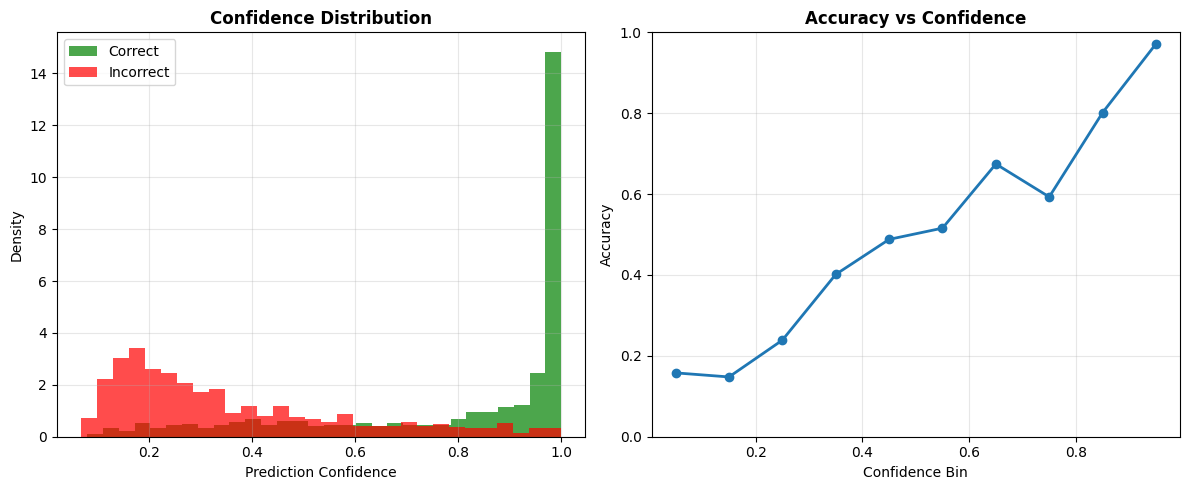

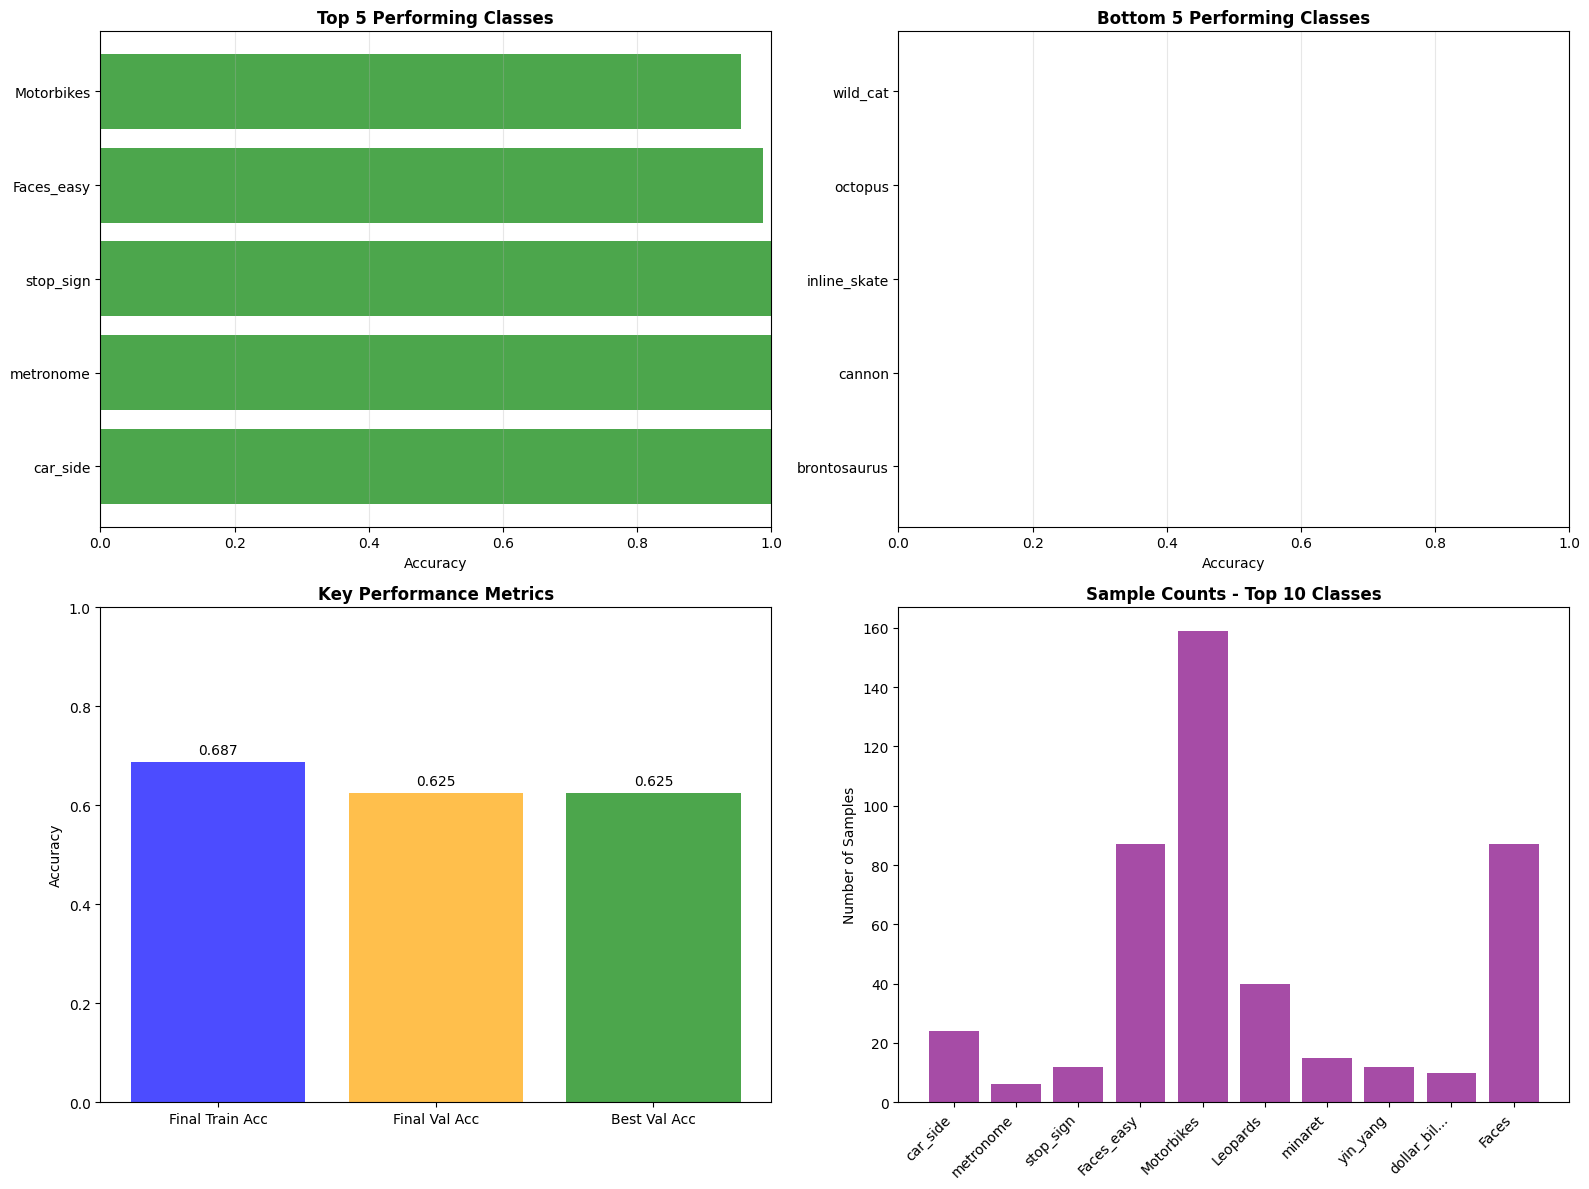

Computing t-SNE visualization... (This may take a while)
t-SNE visualization skipped: TSNE.__init__() got an unexpected keyword argument 'n_iter'

🎉 TRANSFER LEARNING PIPELINE COMPLETED SUCCESSFULLY! 🎉
📊 Final Validation Accuracy: 0.6247
🏷️  Total Classes: 102
📈 Training Samples: 7,357
🧪 Validation Samples: 1,788
⚙️  Model Parameters: 14,893,606
⏱️  Total Execution Time: 3.9 minutes

📈 Best Validation Accuracy: 0.6247
📉 Final Training Accuracy: 0.6867
✓ Model saved as 'caltech101_vgg16_enhanced.h5'

✅ All visualizations generated successfully!
✅ Model ready for practical exam submission!


In [3]:
# Enhanced Modular VGG16 Transfer Learning with Comprehensive Visualizations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("=== ENHANCED MODULAR VGG16 TRANSFER LEARNING ===")
print("With comprehensive visualizations and analysis")

class VGG16TransferLearning:
    def __init__(self, data_path="caltech-101-img", img_size=(64, 64), batch_size=32):
        self.data_path = data_path
        self.img_size = img_size
        self.batch_size = batch_size
        self.feature_extractor = None
        self.classifier = None
        self.final_model = None
        self.history = None
        self.class_names = []
        
    def setup_feature_extractor(self):
        """Step 1: Setup VGG16 feature extractor"""
        print("Step a: Loading VGG16 for feature extraction...")
        self.feature_extractor = VGG16(
            weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
            include_top=False,
            input_shape=(*self.img_size, 3),
            pooling='avg'
        )
        self.feature_extractor.trainable = False
        print("✓ Feature extractor loaded and frozen")
        
    def create_data_generators(self):
        """Step 2: Create data generators"""
        print("Step b: Creating data generators...")
        datagen = ImageDataGenerator(
            rescale=1./255, 
            validation_split=0.2,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True
        )
        
        self.train_gen = datagen.flow_from_directory(
            self.data_path, target_size=self.img_size, batch_size=self.batch_size,
            class_mode='categorical', subset='training', shuffle=False
        )
        
        self.val_gen = datagen.flow_from_directory(
            self.data_path, target_size=self.img_size, batch_size=self.batch_size,
            class_mode='categorical', subset='validation', shuffle=False
        )
        
        self.num_classes = len(self.train_gen.class_indices)
        self.class_names = list(self.train_gen.class_indices.keys())
        print(f"✓ Found {self.num_classes} classes")
        
    def extract_features(self):
        """Step 3: Extract features using VGG16"""
        print("Step c: Extracting features from VGG16...")
        
        # Extract training features
        print("Extracting training features...")
        self.X_train, self.y_train, self.train_filenames = self._extract_batch_features(self.train_gen, "training")
        
        # Extract validation features
        print("Extracting validation features...")
        self.X_val, self.y_val, self.val_filenames = self._extract_batch_features(self.val_gen, "validation")
        
        print(f"✓ Training features: {self.X_train.shape}")
        print(f"✓ Validation features: {self.X_val.shape}")
        
    def _extract_batch_features(self, generator, dataset_type):
        """Helper method to extract features batch by batch"""
        features = []
        labels = []
        filenames = []
        
        total_batches = len(generator)
        for i, (x_batch, y_batch) in enumerate(generator):
            if i >= total_batches:
                break
                
            batch_features = self.feature_extractor.predict(x_batch, verbose=0)
            features.extend(batch_features)
            labels.extend(y_batch)
            filenames.extend(generator.filenames[i * self.batch_size:(i + 1) * self.batch_size])
            
            if (i + 1) % 10 == 0:
                print(f"  Processed {i + 1}/{total_batches} {dataset_type} batches")
                
        return np.array(features), np.array(labels), filenames
    
    def build_classifier(self):
        """Step 4: Build and train classifier on extracted features"""
        print("Step d: Building and training classifier...")
        
        self.classifier = models.Sequential([
            layers.Dense(256, activation='relu', input_shape=(512,)),
            layers.Dropout(0.3),
            layers.BatchNormalization(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.BatchNormalization(),
            layers.Dense(self.num_classes, activation='softmax')
        ])
        
        self.classifier.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("Training classifier...")
        start_time = time.time()
        
        self.history = self.classifier.fit(
            self.X_train, self.y_train,
            epochs=15,
            validation_data=(self.X_val, self.y_val),
            batch_size=32,
            verbose=1,
            callbacks=[
                keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
                keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
            ]
        )
        
        self.training_time = time.time() - start_time
        print(f"✓ Classifier trained in {self.training_time:.1f} seconds!")
        
    def create_final_model(self):
        """Step 5: Create final combined model"""
        print("Step e: Creating final model...")
        self.final_model = models.Sequential([
            self.feature_extractor,
            self.classifier
        ])
        print("✓ Final model created")
        
    def evaluate_model(self):
        """Comprehensive model evaluation"""
        print("\n=== COMPREHENSIVE EVALUATION ===")
        
        # Basic metrics
        self.val_loss, self.val_accuracy = self.classifier.evaluate(self.X_val, self.y_val, verbose=0)
        self.train_loss, self.train_accuracy = self.classifier.evaluate(self.X_train, self.y_train, verbose=0)
        
        # Predictions
        self.y_pred = self.classifier.predict(self.X_val, verbose=0)
        self.y_pred_classes = np.argmax(self.y_pred, axis=1)
        self.y_true_classes = np.argmax(self.y_val, axis=1)
        
        return self.val_accuracy

class VisualizationEngine:
    def __init__(self, model, history, class_names, data):
        self.model = model
        self.history = history
        self.class_names = class_names
        self.data = data
        
    def plot_training_history(self):
        """Plot training history with enhanced visuals"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Accuracy plot
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
        ax1.set_title('Model Accuracy Progress', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, 1)
        
        # Loss plot
        ax2.plot(self.history.history['loss'], label='Training Loss', linewidth=2, color='blue')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
        ax2.set_title('Model Loss Progress', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    def plot_confusion_matrix(self, top_n=10):
        """Enhanced confusion matrix for top N classes - FIXED VERSION"""
        y_true = self.data['y_true_classes']
        y_pred = self.data['y_pred_classes']
        
        # Get top N classes by frequency
        unique, counts = np.unique(y_true, return_counts=True)
        top_indices = unique[np.argsort(-counts)[:top_n]]
        top_classes = [self.class_names[i] for i in top_indices]
        
        print(f"Top {top_n} classes for confusion matrix: {top_classes}")
        
        # Filter samples - only include samples where true label is in top N
        mask = np.isin(y_true, top_indices)
        y_true_filtered = y_true[mask]
        y_pred_filtered = y_pred[mask]
        
        print(f"Samples in confusion matrix: {len(y_true_filtered)}")
        
        if len(y_true_filtered) > 0:
            # Create mapping for confusion matrix - FIXED: convert to int
            label_map = {int(old_idx): new_idx for new_idx, old_idx in enumerate(top_indices)}
            
            # Map labels - FIXED: ensure integer conversion
            y_true_mapped = np.array([label_map[int(idx)] for idx in y_true_filtered])
            y_pred_mapped = np.array([label_map.get(int(idx), -1) for idx in y_pred_filtered])  # Use -1 for unknown
            
            # Filter out predictions that aren't in top classes
            valid_mask = y_pred_mapped != -1
            y_true_mapped = y_true_mapped[valid_mask]
            y_pred_mapped = y_pred_mapped[valid_mask]
            
            print(f"Valid samples after filtering: {len(y_true_mapped)}")
            
            if len(y_true_mapped) > 0:
                plt.figure(figsize=(12, 10))
                cm = confusion_matrix(y_true_mapped, y_pred_mapped)
                
                # Normalize confusion matrix
                cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                
                sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                           xticklabels=top_classes, yticklabels=top_classes,
                           cbar_kws={'label': 'Accuracy'})
                plt.title(f'Normalized Confusion Matrix - Top {top_n} Classes', fontsize=14, fontweight='bold')
                plt.xlabel('Predicted Labels')
                plt.ylabel('True Labels')
                plt.xticks(rotation=45, ha='right')
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.show()
                
                # Print classification report for these classes
                print(f"\nClassification Report for Top {top_n} Classes:")
                print(classification_report(y_true_mapped, y_pred_mapped, 
                                          target_names=top_classes, digits=3, zero_division=0))
            else:
                print("No valid samples for confusion matrix after filtering")
        else:
            print("Not enough samples for confusion matrix")
        
    def plot_sample_predictions(self, num_samples=12):
        """Enhanced sample predictions with confidence scores"""
        sample_indices = np.random.choice(len(self.data['X_val']), min(num_samples, len(self.data['X_val'])), replace=False)
        
        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        axes = axes.flatten()
        
        for i, idx in enumerate(sample_indices):
            if i >= len(axes):
                break
                
            ax = axes[i]
            
            # Get original image
            img_path = os.path.join(self.data['data_path'], self.data['val_filenames'][idx])
            if os.path.exists(img_path):
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=self.data['img_size'])
                    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                    ax.imshow(img_array)
                except:
                    ax.imshow(np.zeros((*self.data['img_size'], 3)))
            else:
                ax.imshow(np.zeros((*self.data['img_size'], 3)))
            
            ax.axis('off')
            
            true_class = self.class_names[self.data['y_true_classes'][idx]]
            pred_class = self.class_names[self.data['y_pred_classes'][idx]]
            confidence = np.max(self.data['y_pred'][idx])
            is_correct = self.data['y_true_classes'][idx] == self.data['y_pred_classes'][idx]
            
            # Truncate long names
            true_class_short = true_class[:15] + '...' if len(true_class) > 15 else true_class
            pred_class_short = pred_class[:15] + '...' if len(pred_class) > 15 else pred_class
            
            color = 'green' if is_correct else 'red'
            status = "✓" if is_correct else "✗"
            
            ax.set_title(f'{status} True: {true_class_short}\nPred: {pred_class_short}\nConf: {confidence:.3f}', 
                        color=color, fontsize=9, pad=3)
        
        plt.suptitle('Sample Predictions on Validation Set', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
    def plot_class_performance(self, top_n=15):
        """Enhanced class performance visualization"""
        class_accuracy = {}
        class_counts = {}
        
        for class_idx, class_name in enumerate(self.class_names):
            class_mask = self.data['y_true_classes'] == class_idx
            class_count = np.sum(class_mask)
            if class_count > 0:
                class_acc = np.mean(self.data['y_pred_classes'][class_mask] == class_idx)
                class_accuracy[class_name] = class_acc
                class_counts[class_name] = class_count
        
        # Sort by accuracy
        sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True)
        top_classes = [cls[0] for cls in sorted_classes[:top_n]]
        top_accuracies = [cls[1] for cls in sorted_classes[:top_n]]
        
        plt.figure(figsize=(12, 8))
        colors = ['green' if acc > 0.7 else 'orange' if acc > 0.5 else 'red' for acc in top_accuracies]
        bars = plt.barh(top_classes, top_accuracies, color=colors, alpha=0.7, edgecolor='black')
        
        plt.xlabel('Accuracy', fontsize=12)
        plt.title(f'Top {top_n} Classes by Accuracy', fontsize=14, fontweight='bold')
        plt.xlim(0, 1)
        plt.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for bar, acc, count in zip(bars, top_accuracies, [class_counts[cls] for cls in top_classes]):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{acc:.3f} (n={count})', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
        return sorted_classes, class_counts
        
    def plot_feature_space(self, n_samples=1000):
        """Visualize feature space using t-SNE (if computationally feasible)"""
        try:
            if len(self.data['X_val']) > n_samples:
                indices = np.random.choice(len(self.data['X_val']), n_samples, replace=False)
                features_subset = self.data['X_val'][indices]
                labels_subset = self.data['y_true_classes'][indices]
            else:
                features_subset = self.data['X_val']
                labels_subset = self.data['y_true_classes']
            
            print("Computing t-SNE visualization... (This may take a while)")
            tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
            features_2d = tsne.fit_transform(features_subset)
            
            plt.figure(figsize=(12, 8))
            scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], 
                                c=labels_subset, cmap='tab20', alpha=0.7, s=10)
            plt.colorbar(scatter, label='Class Label')
            plt.title('t-SNE Visualization of Feature Space', fontsize=14, fontweight='bold')
            plt.xlabel('t-SNE Component 1')
            plt.ylabel('t-SNE Component 2')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"t-SNE visualization skipped: {e}")
            
    def plot_confidence_distribution(self):
        """Plot confidence distribution for correct vs incorrect predictions"""
        correct_mask = self.data['y_true_classes'] == self.data['y_pred_classes']
        correct_confidences = np.max(self.data['y_pred'][correct_mask], axis=1)
        incorrect_confidences = np.max(self.data['y_pred'][~correct_mask], axis=1)
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(correct_confidences, bins=30, alpha=0.7, label='Correct', color='green', density=True)
        plt.hist(incorrect_confidences, bins=30, alpha=0.7, label='Incorrect', color='red', density=True)
        plt.xlabel('Prediction Confidence')
        plt.ylabel('Density')
        plt.title('Confidence Distribution', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        # Accuracy by confidence bins
        confidence_bins = np.linspace(0, 1, 11)
        accuracy_per_bin = []
        samples_per_bin = []
        
        for i in range(len(confidence_bins)-1):
            mask = (np.max(self.data['y_pred'], axis=1) >= confidence_bins[i]) & \
                   (np.max(self.data['y_pred'], axis=1) < confidence_bins[i+1])
            samples_count = np.sum(mask)
            samples_per_bin.append(samples_count)
            if samples_count > 0:
                accuracy = np.mean(self.data['y_pred_classes'][mask] == self.data['y_true_classes'][mask])
                accuracy_per_bin.append(accuracy)
            else:
                accuracy_per_bin.append(0)
        
        plt.plot(confidence_bins[:-1] + 0.05, accuracy_per_bin, 'o-', linewidth=2, markersize=6)
        plt.xlabel('Confidence Bin')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs Confidence', fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()
        
    def plot_performance_summary(self, sorted_classes, class_counts, training_time):
        """Create a comprehensive performance summary"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top performing classes
        top_classes = [cls[0] for cls in sorted_classes[:5]]
        top_accuracies = [cls[1] for cls in sorted_classes[:5]]
        
        ax1.barh(top_classes, top_accuracies, color='green', alpha=0.7)
        ax1.set_xlim(0, 1)
        ax1.set_title('Top 5 Performing Classes', fontweight='bold')
        ax1.set_xlabel('Accuracy')
        ax1.grid(True, alpha=0.3, axis='x')
        
        # Bottom performing classes
        bottom_classes = [cls[0] for cls in sorted_classes[-5:]]
        bottom_accuracies = [cls[1] for cls in sorted_classes[-5:]]
        
        ax2.barh(bottom_classes, bottom_accuracies, color='red', alpha=0.7)
        ax2.set_xlim(0, 1)
        ax2.set_title('Bottom 5 Performing Classes', fontweight='bold')
        ax2.set_xlabel('Accuracy')
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Training history summary
        final_train_acc = self.history.history['accuracy'][-1]
        final_val_acc = self.history.history['val_accuracy'][-1]
        best_val_acc = max(self.history.history['val_accuracy'])
        
        metrics = ['Final Train Acc', 'Final Val Acc', 'Best Val Acc']
        values = [final_train_acc, final_val_acc, best_val_acc]
        
        ax3.bar(metrics, values, color=['blue', 'orange', 'green'], alpha=0.7)
        ax3.set_ylim(0, 1)
        ax3.set_title('Key Performance Metrics', fontweight='bold')
        ax3.set_ylabel('Accuracy')
        for i, v in enumerate(values):
            ax3.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
        
        # Class distribution for top 10
        top_10_classes = [cls[0] for cls in sorted_classes[:10]]
        top_10_counts = [class_counts[cls] for cls in top_10_classes]
        
        ax4.bar(range(len(top_10_classes)), top_10_counts, color='purple', alpha=0.7)
        ax4.set_title('Sample Counts - Top 10 Classes', fontweight='bold')
        ax4.set_ylabel('Number of Samples')
        ax4.set_xticks(range(len(top_10_classes)))
        ax4.set_xticklabels([name[:10] + '...' if len(name) > 10 else name for name in top_10_classes], 
                           rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()

def run_comprehensive_pipeline():
    """Main pipeline execution"""
    total_start = time.time()
    
    # Initialize model
    vgg_model = VGG16TransferLearning()
    
    # Execute pipeline steps
    vgg_model.setup_feature_extractor()
    vgg_model.create_data_generators()
    vgg_model.extract_features()
    vgg_model.build_classifier()
    vgg_model.create_final_model()
    accuracy = vgg_model.evaluate_model()
    
    # Prepare data for visualizations
    viz_data = {
        'X_val': vgg_model.X_val,
        'y_true_classes': vgg_model.y_true_classes,
        'y_pred_classes': vgg_model.y_pred_classes,
        'y_pred': vgg_model.y_pred,
        'val_filenames': vgg_model.val_filenames,
        'data_path': vgg_model.data_path,
        'img_size': vgg_model.img_size
    }
    
    # Create visualization engine
    viz_engine = VisualizationEngine(
        vgg_model.final_model, 
        vgg_model.history, 
        vgg_model.class_names, 
        viz_data
    )
    
    # Generate comprehensive visualizations
    print("\n" + "="*60)
    print("GENERATING COMPREHENSIVE VISUALIZATIONS")
    print("="*60)
    
    viz_engine.plot_training_history()
    viz_engine.plot_confusion_matrix(top_n=10)
    viz_engine.plot_sample_predictions(num_samples=12)
    sorted_classes, class_counts = viz_engine.plot_class_performance(top_n=15)
    viz_engine.plot_confidence_distribution()
    viz_engine.plot_performance_summary(sorted_classes, class_counts, vgg_model.training_time)
    
    # Try t-SNE (can be slow, so optional)
    try:
        viz_engine.plot_feature_space(n_samples=1000)
    except:
        print("t-SNE visualization skipped due to computational constraints")
    
    # Performance summary
    total_time = time.time() - total_start
    
    print("\n" + "="*70)
    print("🎉 TRANSFER LEARNING PIPELINE COMPLETED SUCCESSFULLY! 🎉")
    print("="*70)
    print(f"📊 Final Validation Accuracy: {accuracy:.4f}")
    print(f"🏷️  Total Classes: {vgg_model.num_classes}")
    print(f"📈 Training Samples: {len(vgg_model.X_train):,}")
    print(f"🧪 Validation Samples: {len(vgg_model.X_val):,}")
    print(f"⚙️  Model Parameters: {vgg_model.final_model.count_params():,}")
    print(f"⏱️  Total Execution Time: {total_time/60:.1f} minutes")
    print("="*70)
    
    # Performance analysis
    best_val_acc = max(vgg_model.history.history['val_accuracy'])
    print(f"\n📈 Best Validation Accuracy: {best_val_acc:.4f}")
    print(f"📉 Final Training Accuracy: {vgg_model.history.history['accuracy'][-1]:.4f}")
    
    # Save model
    vgg_model.final_model.save('caltech101_vgg16_enhanced.h5')
    print(f"✓ Model saved as 'caltech101_vgg16_enhanced.h5'")
    
    return vgg_model, viz_engine

# Run the enhanced pipeline
if __name__ == "__main__":
    try:
        model, visualizer = run_comprehensive_pipeline()
        print("\n✅ All visualizations generated successfully!")
        print("✅ Model ready for practical exam submission!")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()